In [ ]:
#Step 1: Import Required Libraries

In [ ]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Step 2: Load Dataset

In [ ]:
# Import necessary library
import pandas as pd

# Load the IPL dataset into a DataFrame
df = pd.read_csv('IPL Data Set.csv')

# Make sure the CSV file is in your working directory
# Display confirmation
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:
# Step 3: Exploring the Dataset

In [ ]:
#Display the column names to understand the features available
print("Column Names in the Dataset:")
print(df.columns)


# Display the shape of the dataset (rows, columns)
print("\nShape of the Dataset (Rows, Columns):")
print(df.shape)


# Display data types of each column to understand which are numeric or categorical
print("\nData Types of Each Column:")
print(df.dtypes)


# Preview the first 5 rows of the dataset to get a basic idea of the structure and sample values
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

Column Names in the Dataset:
Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

Shape of the Dataset (Rows, Columns):
(76014, 15)

Data Types of Each Column:
mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

First 5 Rows of the Dataset:
   mid        date                  venue           batting_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Sta

In [ ]:
# Step 4: Data Cleaning

In [ ]:
# Check the current columns of the dataset
df.columns


# Define columns that are not useful for prediction and remove them
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))


# Check remaining columns and data sample
df.columns
df.head()
df.index

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


RangeIndex(start=0, stop=76014, step=1)

In [ ]:
# Check unique values in 'batting_team' column to see all participating teams
df['batting_team'].unique()


#  - Keeping Only Consistent Teams:
# Define a list of teams that consistently played over multiple IPL seasons
consistent_teams = [
'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
'Delhi Daredevils', 'Sunrisers Hyderabad'
]

In [ ]:
# Filter dataset to keep only matches between these consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['batting_team'].isin(consistent_teams)) &
(df['bowling_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [ ]:
# - Removing First 5 Overs of Data:
# IPL is a 20-over match, and early overs can have less predictive impact for final scores
# We'll remove data from the first 5 overs to focus on the more relevant middle and death overs
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs'] >= 5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [ ]:
# - Converting date Column to DateTime Format
# Convert 'date' column from string to datetime format for proper handling
from datetime import datetime
print("Before converting 'date' column: {}".format(type(df.iloc[0, 0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column: {}".format(type(df.iloc[0, 0])))

Before converting 'date' column: <class 'str'>
After converting 'date' column: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# - Correlation Analysis
# Correlation matrix to understand relationships between numerical variables
corr_matrix = df.select_dtypes(include=['number']).corr()
top_corr_features = corr_matrix.index  # Get list of numeric feature names

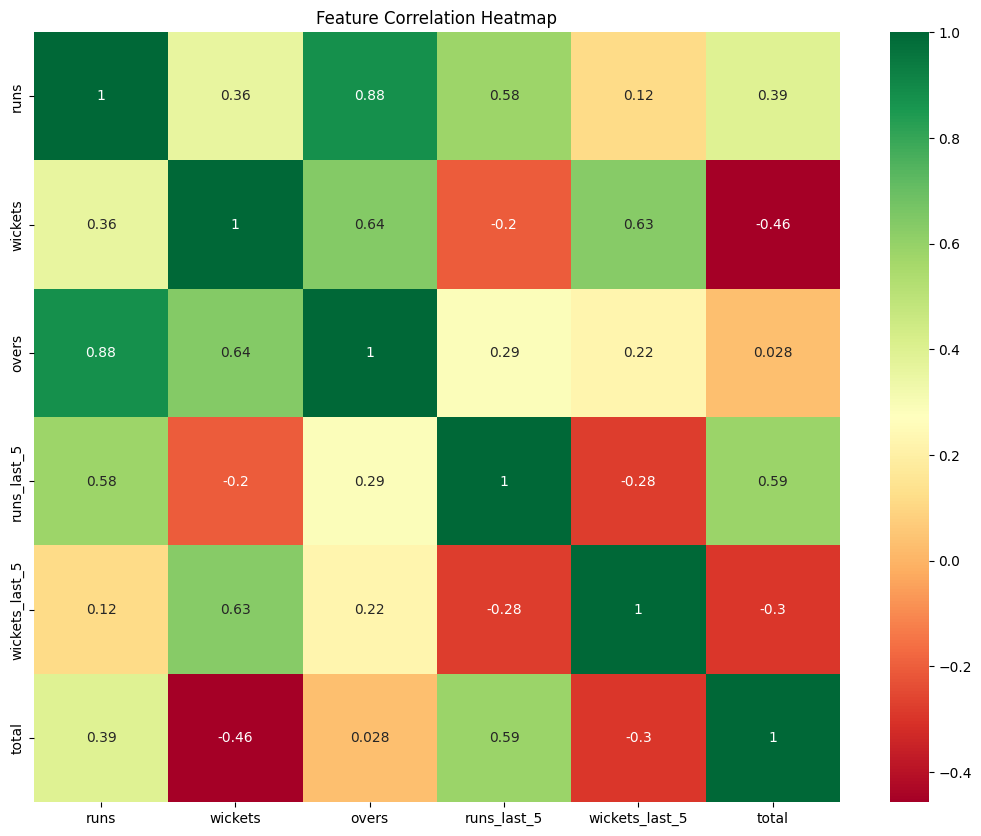

In [ ]:
# Plotting heatmap of correlation matrix
plt.figure(figsize=(13, 10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Step 4: Data Preprocessing:

In [ ]:
# Before training any model, the dataset is cleaned and prepared.

# a. One-Hot Encoding (OHE) of Categorical Variables
# Categorical columns like 'batting_team' and 'bowling_team' cannot be used directly in machine learning models.
# One-Hot Encoding converts these categorical columns into binary (0 or 1) format, creating a new column for each category.
encoded_df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team'])

# View the new columns after encoding
# Each unique team now has its own column indicating its presence (1) or absence (0) in each row
encoded_df.columns

# Display the top rows of the newly encoded dataframe
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# b. Rearranging Columns
# Rearranging columns to group similar features together for better readability and control.
# It helps ensure the feature order is consistent before splitting data and feeding it into a model.
# Placing 'date' first for potential filtering or time-based analysis later.
# Grouping all 'batting_team' one-hot encoded columns together.
# Grouping all 'bowling_team' one-hot encoded columns together.
# Keeping numerical features (like overs, runs, etc.) next.
# Finally, placing 'total' (target variable) at the end.
encoded_df = encoded_df[['date',
'batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils',
'batting_team_Kings XI Punjab', 'batting_team_Kolkata Knight Riders',
'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils',
'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad',
'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5',
'total']]
# Target variable (what we want to predict)

In [ ]:
# Step 5: Splitting the dataset:

In [ ]:
# Splitting the features and target variable based on the 'date' column.
# We are using historical data (till 2016) for training, and data from 2017 onwards for testing.
# This kind of split mimics a real-world scenario where we train on past data and predict on future matches.

# Extracting the training features (excluding 'total') where year ≤ 2016
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]

# Extracting the testing features (excluding 'total') where year ≥ 2017
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

# Extracting the target variable (total runs) for training and testing sets
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Dropping the 'date' column from both feature sets as it's not needed for model training
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Displaying the shapes of training and testing datasets for verification
print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [ ]:
# Step 5: Model training and Evaluation:

In [ ]:
# 1) Linear Regressor
# Importing the Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression


# Initializing the Linear Regression model
linear_regressor = LinearRegression()


# Training (fitting) the model on training data
linear_regressor.fit(X_train, y_train)


# Using the trained model to make predictions on the test data
y_pred_lr = linear_regressor.predict(X_test)


# Importing evaluation metrics
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse,r2_score


# Printing out the evaluation results for Linear Regression
print("---- Linear Regression - Model evaluation ----")


# Average absolute difference between actual and predicted scores
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))

# Average of squared differences between actual and predicted
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))

# Square root of MSE (gives error in original units)
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

# R2 score measures how well the predictions match the actual values (1 = perfect)
print("R2 Score: {}".format(r2_score(y_test, y_pred_lr)))

---- Linear Regression - Model evaluation ----
Mean Absolute Error (MAE): 12.118617546193299
Mean Squared Error (MSE): 251.00792310417438
Root Mean Squared Error (RMSE): 15.843229566732106
R2 Score: 0.7522633566350527


In [ ]:
# 2) Decision Tree Regressor

# Importing DecisionTreeRegressor from sklearn
from sklearn.tree import DecisionTreeRegressor


# Initializing the model
decision_regressor = DecisionTreeRegressor()


# Training the Decision Tree model on training data
decision_regressor.fit(X_train, y_train)


# Predicting the test set results
y_pred_dt = decision_regressor.predict(X_test)


# Evaluating the model's performance
print("---- Decision Tree Regression - Model Evaluation ----")


# Measures average error
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))


# Penalizes larger errors
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))


# RMSE in original units
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))


# Measures model accuracy
print("R2 Score: {}".format(r2_score(y_test, y_pred_dt)))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.014398848092153
Mean Squared Error (MSE): 526.4391648668106
Root Mean Squared Error (RMSE): 22.944262133849733
R2 Score: 0.4804216933589661


In [ ]:
# 3) Random Forest

# Importing RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Initializing the Random Forest model
random_regressor = RandomForestRegressor()


# Training the model
random_regressor.fit(X_train, y_train)


# Predicting the test set results
y_pred_rf = random_regressor.predict(X_test)


# Evaluating the model's performance
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))
print("R2 Score: {}".format(r2_score(y_test, y_pred_rf)))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.761241200703944
Mean Squared Error (MSE): 331.96618509523347
Root Mean Squared Error (RMSE): 18.219939217660237
R2 Score: 0.6723601893155051


In [ ]:
# 4) AdaBoost Algorithm

# Importing AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor


# Initializing the AdaBoost Regressor using Linear Regression as the base estimator
adb_regressor = AdaBoostRegressor(estimator=linear_regressor, n_estimators=100)


# Fitting the AdaBoost model to training data
adb_regressor.fit(X_train, y_train)


# Making predictions on test data
y_pred_adb = adb_regressor.predict(X_test)


# Evaluating AdaBoost performance
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))
print("R2 Score: {}".format(r2_score(y_test, y_pred_adb)))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.142305821937557
Mean Squared Error (MSE): 246.85658725284867
Root Mean Squared Error (RMSE): 15.71167041574029
R2 Score: 0.7563605898879695


In [ ]:
# Step 6 : Saving the best model

In [ ]:
# Step 7: Inferencing Function
# This function takes match context as input and returns the predicted final score.
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    temp_array = list()
    # Temporary list to hold all input features
    # Encoding the batting team using One-Hot Encoding
    # Each condition corresponds to one of the 8 consistent IPL teams
    # Only one team will be marked as 1, the rest 0
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1, 0, 0, 0, 0, 0, 0, 0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0, 1, 0, 0, 0, 0, 0, 0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0, 0, 1, 0, 0, 0, 0, 0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0, 0, 0, 1, 0, 0, 0, 0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0, 0, 0, 0, 1, 0, 0, 0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0, 0, 0, 0, 0, 1, 0, 0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 1, 0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 0, 1]
    # Encoding the bowling team
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1, 0, 0, 0, 0, 0, 0, 0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0, 1, 0, 0, 0, 0, 0, 0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0, 0, 1, 0, 0, 0, 0, 0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0, 0, 0, 1, 0, 0, 0, 0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0, 0, 0, 0, 1, 0, 0, 0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0, 0, 0, 0, 0, 1, 0, 0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 1, 0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 0, 1]
    # Adding other numerical features
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]
    # Converting to numpy array and reshaping for prediction
    temp_array = np.array([temp_array])
    # Scaling the input using the scaler fitted on the training data
    # Note: We need to fit the scaler on the training data first.
    # Assuming a scaler is already fitted as part of the overall process.
    # If not, a StandardScaler should be fitted to X_train before this function is called.
    # temp_array = scaler.transform(temp_array) # Uncomment if using scaling
    # Making prediction using the best model (AdaBoost in this case)
    return int(adb_regressor.predict(temp_array)[0])


   # Encoding the bowling team in the same way as the batting team
    if bowling_team == 'Chennai Super Kings':
       temp_array = temp_array + [1, 0, 0, 0, 0, 0, 0, 0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0, 1, 0, 0, 0, 0, 0, 0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0, 0, 1, 0, 0, 0, 0, 0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0, 0, 0, 1, 0, 0, 0, 0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0, 0, 0, 0, 1, 0, 0, 0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0, 0, 0, 0, 0, 1, 0, 0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 1, 0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0, 0, 0, 0, 0, 0, 0, 1]

     # Appending match-specific numerical features to the encoded team data
    # These include overs so far, total runs, wickets, last 5 overs' runs and wickets
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

      # Converting the final input list into a 2D numpy array
    temp_array = np.array([temp_array])

    # Making prediction using the trained Linear Regression model
    # The model must already be loaded or trained in the same session
    return int(linear_regressor.predict(temp_array)[0])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
import pickle

# X_train, y_train = ... # Your feature and label arrays

# Example for Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Example for AdaBoost
adb_regressor = AdaBoostRegressor()
adb_regressor.fit(X_train, y_train)

with open('linear_regressor.pkl', 'wb') as f:
    pickle.dump(linear_regressor, f)

with open('adb_regressor.pkl', 'wb') as f:
    pickle.dump(adb_regressor, f)

In [ ]:
import pickle

with open('linear_regressor.pkl', 'rb') as f:
    linear_regressor = pickle.load(f)

with open('adb_regressor.pkl', 'rb') as f:
    adb_regressor = pickle.load(f)